In [ ]:
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive if you haven't already
drive.mount('/content/drive')

# Specify the folder path containing images

Mounted at /content/drive


In [ ]:
!pip uninstall dlib

!pip install dlib

Found existing installation: dlib 19.24.2
Uninstalling dlib-19.24.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/_dlib_pybind11.cpython-311-x86_64-linux-gnu.so
    /usr/local/lib/python3.11/dist-packages/dlib-19.24.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/dlib/*
Proceed (Y/n)? Y
  Successfully uninstalled dlib-19.24.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp311-cp311-linux_x86_64.whl size=4490666 sha256=4e746842ac3196cf69a36f2f6cd0b5b0bc030d8c9c806c17fe095964e176df0f
  Stored in directory: /root/.cache/pip/wheels/fe/c7/1f/c778b9f7cc6d8d0da4f6697f619f9eb5a49d54d2a2c8267f3c
Successfully built dlib


In [ ]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

# Assuming you have already defined `detector` and `predictor` using dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/SOP_Data/shape_predictor_68_face_landmarks.dat")

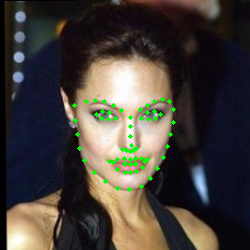

Relevant Landmarks: [(130, 117), (130, 126), (130, 136), (131, 145), (122, 149), (126, 150), (130, 151), (133, 150), (136, 148), (96, 114), (102, 111), (109, 112), (115, 118), (108, 119), (101, 118), (141, 118), (147, 112), (154, 111), (160, 114), (155, 118), (148, 119), (141, 158), (117, 159), (124, 158), (130, 159), (135, 158), (130, 172), (125, 172), (129, 189)]


In [ ]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

# Load the detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/SOP_Data/shape_predictor_68_face_landmarks.dat")

def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) == 0:
        print("No face detected.")
        return None

    face = faces[0]
    landmarks = predictor(gray, face)

    # Draw landmarks on the image
    for i in range(68):
        x, y = landmarks.part(i).x, landmarks.part(i).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Green dots

    # Display the image with landmarks
    cv2_imshow(image)

    # Convert to list of (x, y) coordinates
    landmark_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    return landmark_list  # Return as a list of tuples

# Get the landmarks
land = process_image("/content/drive/MyDrive/Dataset2/Angelina_Jolie_0014.jpg")

def select_relevant_landmarks(landmarks_68):
    """
    Selects 31 relevant facial landmarks from the 68 detected landmarks.
    Args:
        landmarks_68 (list of tuples): List of (x, y) coordinates for all 68 facial landmarks.
    Returns:
        list of tuples: List of (x, y) coordinates for the selected 31 relevant landmarks.
    """
    relevant_indices = [
        27, 28, 29, 30, 31, 32, 33, 34, 35,   # Nose bridge and tip
        36, 37, 38, 39, 40, 41,               # Left eye
        42, 43, 44, 45, 46, 47,               # Right eye
        53, 49, 50, 51, 52,                   # Upper lip (mouth)
        57, 58,                               # Lower lip (mouth)
        8                                     # Chin landmark
    ]

    # Ensure landmarks_68 is a list before indexing
    if not isinstance(landmarks_68, list):
        print("Error: Expected a list of (x, y) coordinates.")
        return None

    # Extract relevant landmarks
    relevant_landmarks = [landmarks_68[i] for i in relevant_indices]
    return relevant_landmarks

# Select relevant landmarks
if land:
    relevant_landmarks = select_relevant_landmarks(land)
    print("Relevant Landmarks:", relevant_landmarks)


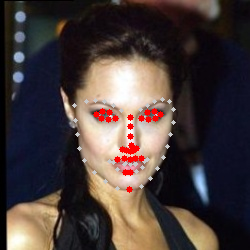

In [ ]:
def process_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) == 0:
        print("No face detected.")
        return None

    face = faces[0]
    landmarks = predictor(gray, face)

    # Convert to list of (x, y) coordinates
    landmark_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    # Draw ALL 68 landmarks in light gray (faint)
    for i, (x, y) in enumerate(landmark_list):
        cv2.circle(image, (x, y), 2, (200, 200, 200), -1)  # Light gray for all points

    # Select and highlight the relevant landmarks (31 points)
    relevant_indices = [
        27, 28, 29, 30, 31, 32, 33, 34, 35,   # Nose bridge and tip
        36, 37, 38, 39, 40, 41,               # Left eye
        42, 43, 44, 45, 46, 47,               # Right eye
        53, 49, 50, 51, 52,                   # Upper lip (mouth)
        57, 58,                               # Lower lip (mouth)
        8                                     # Chin landmark
    ]

    for idx in relevant_indices:
        x, y = landmark_list[idx]
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)  # Red for selected points (no text)

    # Display the image with highlighted landmarks
    cv2_imshow(image)

    return landmark_list

# Example usage
land = process_image("/content/drive/MyDrive/Dataset2/Angelina_Jolie_0014.jpg")

In [ ]:
def convert_to_sift_keypoint(landmark_location, diameter):
    """
    Converts a landmark location into a SIFT keypoint.
    Args:
        landmark_location (tuple): (x, y) coordinates of the landmark.
        diameter (float): Diameter of the keypoint region.
    Returns:
        cv2.KeyPoint: SIFT keypoint object.
    """
    x, y = landmark_location
    return cv2.KeyPoint(x, y,diameter)  # Corrected "size" parameter


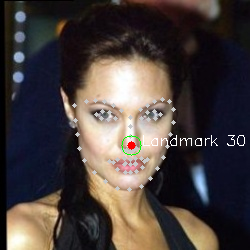

In [ ]:
def process_image(image_path, highlight_index=None, keypoint_diameter=20):
    """
    Process an image to detect and highlight facial landmarks.

    Args:
        image_path (str): Path to the input image.
        highlight_index (int, optional): Index of the landmark to highlight with a circle. Default=None.
        keypoint_diameter (float): Diameter of the keypoint circle (for visualization).
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) == 0:
        print("No face detected.")
        return None

    face = faces[0]
    landmarks = predictor(gray, face)

    # Convert to list of (x, y) coordinates
    landmark_list = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    # Draw ALL 68 landmarks in light gray (faint)
    for i, (x, y) in enumerate(landmark_list):
        cv2.circle(image, (x, y), 2, (200, 200, 200), -1)  # Light gray for all points

    # Highlight the selected landmark (if specified)
    if highlight_index is not None and 0 <= highlight_index < 68:
        x, y = landmark_list[highlight_index]

        # Draw the SIFT keypoint circle (in green)
        cv2.circle(image, (x, y), int(keypoint_diameter // 2), (0, 255, 0), 1)  # Green circle

        # Highlight the landmark itself (in red)
        cv2.circle(image, (x, y), 4, (0, 0, 255), -1)  # Bigger red dot

        # Optional: Add text label
        cv2.putText(image, f"Landmark {highlight_index}", (x + 10, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Display the image
    cv2_imshow(image)
    return landmark_list
# Highlight landmark 30 (nose tip) with a keypoint circle of diameter 20 pixels
land = process_image(
    image_path="/content/drive/MyDrive/Dataset2/Angelina_Jolie_0014.jpg",
    highlight_index=30,
    keypoint_diameter=20
)

Creating dataset

In [ ]:
import os
import pandas as pd

folder_path = "/content/drive/MyDrive/Dataset2"

# Get list of all image files
image_files = []
valid_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

for filename in os.listdir(folder_path):
    if filename.lower().endswith(valid_extensions):
        image_files.append(filename)

# Create DataFrame
df = pd.DataFrame(image_files, columns=['Image_Name'])

# Extract Name (removing numbers and file extension)
df['Name'] = df['Image_Name'].str.replace(r'_\d+\.\w+$', '', regex=True)

# Display first few rows of the DataFrame
print("Total images found:", len(df))
print("\nFirst few entries of the DataFrame:")
print(df.head())

# Optionally save to CSV
# df.to_csv('image_names.csv', index=False)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Name'], random_state=42)
test_df

Total images found: 86

First few entries of the DataFrame:
              Image_Name          Name
0  Andre_Agassi_0010.jpg  Andre_Agassi
1  Andre_Agassi_0002.jpg  Andre_Agassi
2  Andre_Agassi_0008.jpg  Andre_Agassi
3  Andre_Agassi_0015.jpg  Andre_Agassi
4  Andre_Agassi_0003.jpg  Andre_Agassi


,Image_Name,Name
59,Angelina_Jolie_0009.jpg,Angelina_Jolie
44,Angelina_Jolie_0019.jpg,Angelina_Jolie
10,Andre_Agassi_0001.jpg,Andre_Agassi
60,Angelina_Jolie_0003.jpg,Angelina_Jolie
20,Andy_Roddick_0003.jpg,Andy_Roddick
65,Ann_Veneman_0001.jpg,Ann_Veneman
12,Andre_Agassi_0005.jpg,Andre_Agassi
43,Anna_Kournikova_0006.jpg,Anna_Kournikova
32,Andy_Roddick_0007.jpg,Andy_Roddick
3,Andre_Agassi_0015.jpg,Andre_Agassi


In [ ]:
import os
import cv2
import numpy as np
import dlib
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/SOP_Data/shape_predictor_68_face_landmarks.dat")

# Define function to extract 31 relevant facial landmarks
def select_relevant_landmarks(landmarks_68):
    relevant_indices = [
        27, 28, 29, 30, 31, 32, 33, 34, 35,   # Nose bridge and tip
        36, 37, 38, 39, 40, 41,               # Left eye
        42, 43, 44, 45, 46, 47,               # Right eye
        53, 49, 50, 51, 52,                   # Upper lip (mouth)
        57, 58,                               # Lower lip (mouth)
        8                                     # Chin landmark
    ]
    return [landmarks_68[i] for i in relevant_indices] if isinstance(landmarks_68, list) else None

# Define function to extract facial landmarks
def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) == 0:
        return None  # No face detected

    landmarks = predictor(gray, faces[0])
    return [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

# Convert to SIFT keypoint
def convert_to_sift_keypoint(landmark_location, diameter=4):
    x, y = landmark_location
    return cv2.KeyPoint(float(x), float(y), float(diameter))

# Extract SIFT descriptor with sigma=1.6
def extract_sift_descriptor(image_path, landmark):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None

    # Initialize SIFT with sigma=1.6
    sift = cv2.SIFT_create(sigma=1.6)

    keypoint = [convert_to_sift_keypoint(landmark)]
    _, descriptor = sift.compute(image, keypoint)

    return descriptor.flatten() if descriptor is not None else None

# Load dataset
folder_path = "/content/drive/MyDrive/Dataset2"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
df = pd.DataFrame(image_files, columns=['Image_Name'])
df['Name'] = df['Image_Name'].str.replace(r'_\d+\.\w+$', '', regex=True)

# Function to process SIFT descriptors for all 31 relevant landmarks
# Modified function to process SIFT descriptors with proper storage format
def process_all_sift_descriptors(df, folder_path):
    """
    Processes images in the given DataFrame to extract SIFT descriptors for all relevant landmarks,
    storing the descriptors in a parseable string format.
    """
    landmark_dfs = {}

    for landmark_idx in range(29):  # For all 29 landmarks
        sift_descriptors = []

        for _, row in df.iterrows():
            image_path = os.path.join(folder_path, row['Image_Name'])
            landmarks = extract_landmarks(image_path)

            if landmarks:
                relevant_landmarks = select_relevant_landmarks(landmarks)
                if relevant_landmarks:
                    landmark = relevant_landmarks[landmark_idx]
                    descriptor = extract_sift_descriptor(image_path, landmark)

                    # Convert descriptor to a parseable string format
                    if descriptor is not None:
                        # Store as comma-separated values without brackets
                        descriptor_str = ",".join(map(str, descriptor))
                    else:
                        descriptor_str = None
                else:
                    descriptor_str = None
            else:
                descriptor_str = None

            sift_descriptors.append(descriptor_str)

        # Create DataFrame for this landmark
        landmark_df = df.copy()
        landmark_df[f'Landmark_{landmark_idx}_SIFT_Descriptor'] = sift_descriptors
        landmark_dfs[f'Landmark_{landmark_idx}'] = landmark_df

    return landmark_dfs

# Process all landmarks with proper storage format
landmark_dfs = process_all_sift_descriptors(train_df, folder_path)

# Save each DataFrame to CSV
output_folder = "/content/drive/MyDrive/SIFT_Descriptors_train_df"
os.makedirs(output_folder, exist_ok=True)

for landmark_name, landmark_df in landmark_dfs.items():
    output_path = os.path.join(output_folder, f"{landmark_name}_SIFT_Descriptors.csv")
    landmark_df.to_csv(output_path, index=False)
    print(f"Saved {output_path}")

Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_0_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_1_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_2_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_3_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_4_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_5_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_6_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_7_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_8_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_9_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_10_SIFT_Descriptors.csv
Saved /content/drive/MyDrive/SIFT_Descript

In [ ]:
landmark_dfs = process_all_sift_descriptors(test_df, folder_path)

# Save each DataFrame to a separate CSV file
output_folder = "/content/drive/MyDrive/SIFT_Descriptors_test_df"
os.makedirs(output_folder, exist_ok=True)

for landmark_name, landmark_df in landmark_dfs.items():
    output_path = os.path.join(output_folder, f"{landmark_name}_SIFT_Descriptors.csv")
    landmark_df.to_csv(output_path, index=False)
    print(f"Saved {output_path}")

NameError: name 'process_all_sift_descriptors' is not defined

In [ ]:
def expand_sift_descriptors(df):
    """
    Optimized version that expands all SIFT descriptor columns into 128 separate columns
    using pd.concat to avoid DataFrame fragmentation.
    """
    # Make a copy of original non-descriptor columns
    original_cols = [col for col in df.columns if 'SIFT_Descriptor' not in col]
    result_df = df[original_cols].copy()

    # Find all SIFT descriptor columns
    sift_cols = [col for col in df.columns if 'SIFT_Descriptor' in col]

    for col in sift_cols:
        # Extract base name for new columns
        base_name = col.replace('_SIFT_Descriptor', '')

        # Create a temporary DataFrame for the expanded features
        temp_dfs = []

        # Create all 128 columns at once
        for i in range(128):
            new_col_name = f"{base_name}_SIFT_{i}"
            temp_df = pd.DataFrame({
                new_col_name: df[col].apply(
                    lambda x: float(x.split(',')[i]) if pd.notna(x) and len(x.split(',')) > i else None
                )
            })
            temp_dfs.append(temp_df)

        # Concatenate all temporary DataFrames at once
        expanded_features = pd.concat(temp_dfs, axis=1)

        # Join with the result DataFrame
        result_df = pd.concat([result_df, expanded_features], axis=1)

    return result_df

In [ ]:
# Load your saved CSV
df = pd.read_csv("/content/drive/MyDrive/SIFT_Descriptors_train_df/Landmark_0_SIFT_Descriptors.csv")

# Expand the descriptor column
expanded_df = expand_sift_descriptors(df)

# View the expanded columns
expanded_df

,Image_Name,Name,Landmark_0_SIFT_0,Landmark_0_SIFT_1,Landmark_0_SIFT_2,Landmark_0_SIFT_3,Landmark_0_SIFT_4,Landmark_0_SIFT_5,Landmark_0_SIFT_6,Landmark_0_SIFT_7,...,Landmark_0_SIFT_118,Landmark_0_SIFT_119,Landmark_0_SIFT_120,Landmark_0_SIFT_121,Landmark_0_SIFT_122,Landmark_0_SIFT_123,Landmark_0_SIFT_124,Landmark_0_SIFT_125,Landmark_0_SIFT_126,Landmark_0_SIFT_127
0,Angelina_Jolie_0010.jpg,Angelina_Jolie,4.0,119.0,62.0,0.0,0.0,0.0,0.0,0.0,...,46.0,41.0,0.0,0.0,0.0,0.0,3.0,100.0,48.0,0.0
1,Ann_Veneman_0010.jpg,Ann_Veneman,2.0,77.0,39.0,9.0,10.0,11.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,5.0,31.0,65.0,14.0,0.0
2,Andre_Agassi_0002.jpg,Andre_Agassi,89.0,120.0,18.0,0.0,0.0,0.0,2.0,17.0,...,5.0,11.0,1.0,0.0,0.0,0.0,24.0,120.0,48.0,4.0
3,Andre_Agassi_0007.jpg,Andre_Agassi,73.0,102.0,23.0,0.0,0.0,0.0,0.0,13.0,...,8.0,5.0,6.0,1.0,0.0,0.0,16.0,129.0,67.0,9.0
4,Andre_Agassi_0006.jpg,Andre_Agassi,9.0,127.0,47.0,0.0,0.0,0.0,0.0,0.0,...,4.0,12.0,0.0,0.0,0.0,0.0,30.0,127.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Ari_Fleischer_0009.jpg,Ari_Fleischer,9.0,119.0,33.0,3.0,8.0,3.0,1.0,0.0,...,4.0,2.0,52.0,15.0,0.0,1.0,45.0,48.0,19.0,45.0
64,Ari_Fleischer_0008.jpg,Ari_Fleischer,13.0,124.0,29.0,1.0,0.0,0.0,1.0,1.0,...,6.0,6.0,29.0,4.0,0.0,0.0,22.0,32.0,14.0,41.0
65,Angelina_Jolie_0016.jpg,Angelina_Jolie,14.0,64.0,130.0,8.0,0.0,0.0,0.0,0.0,...,18.0,6.0,0.0,0.0,0.0,1.0,12.0,123.0,23.0,0.0
66,Andy_Roddick_0002.jpg,Andy_Roddick,71.0,127.0,31.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,7.0,1.0,2.0,40.0,46.0,1.0,0.0


In [ ]:
import pandas as pd
import os

def expand_sift_descriptors_in_all_files(directory_path, num_files=29):
    """
    Process all SIFT descriptor CSV files in the specified directory,
    expand the descriptors, and overwrite the original files.

    Args:
        directory_path (str): Path to the directory containing the CSV files
        num_files (int): Number of files to process (0 to num_files-1)
    """
    for i in range(num_files):
        # Construct file path
        file_name = f"Landmark_{i}_SIFT_Descriptors.csv"
        file_path = os.path.join(directory_path, file_name)

        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File {file_name} not found, skipping...")
            continue

        try:
            # Load the CSV file
            df = pd.read_csv(file_path)

            # Expand the descriptors
            expanded_df = expand_sift_descriptors(df)

            # Save back to the same file, overwriting the original
            expanded_df.to_csv(file_path, index=False)
            print(f"Processed and overwrote {file_name}")

        except Exception as e:
            print(f"Error processing {file_name}: {str(e)}")

def expand_sift_descriptors(df):
    """
    Optimized version that expands all SIFT descriptor columns into 128 separate columns
    using pd.concat to avoid DataFrame fragmentation.
    """
    # Make a copy of original non-descriptor columns
    original_cols = [col for col in df.columns if 'SIFT_Descriptor' not in col]
    result_df = df[original_cols].copy()

    # Find all SIFT descriptor columns
    sift_cols = [col for col in df.columns if 'SIFT_Descriptor' in col]

    for col in sift_cols:
        # Extract base name for new columns
        base_name = col.replace('_SIFT_Descriptor', '')

        # Create a temporary DataFrame for the expanded features
        temp_dfs = []

        # Create all 128 columns at once
        for i in range(128):
            new_col_name = f"{base_name}_SIFT_{i}"
            temp_df = pd.DataFrame({
                new_col_name: df[col].apply(
                    lambda x: float(x.split(',')[i]) if pd.notna(x) and len(x.split(',')) > i else None
                )
            })
            temp_dfs.append(temp_df)

        # Concatenate all temporary DataFrames at once
        expanded_features = pd.concat(temp_dfs, axis=1)

        # Join with the result DataFrame
        result_df = pd.concat([result_df, expanded_features], axis=1)

    return result_df

# Usage example:
directory_path = "/content/drive/MyDrive/SIFT_Descriptors_train_df"
expand_sift_descriptors_in_all_files(directory_path, num_files=29)

Processed and overwrote Landmark_0_SIFT_Descriptors.csv
Processed and overwrote Landmark_1_SIFT_Descriptors.csv
Processed and overwrote Landmark_2_SIFT_Descriptors.csv
Processed and overwrote Landmark_3_SIFT_Descriptors.csv
Processed and overwrote Landmark_4_SIFT_Descriptors.csv
Processed and overwrote Landmark_5_SIFT_Descriptors.csv
Processed and overwrote Landmark_6_SIFT_Descriptors.csv
Processed and overwrote Landmark_7_SIFT_Descriptors.csv
Processed and overwrote Landmark_8_SIFT_Descriptors.csv
Processed and overwrote Landmark_9_SIFT_Descriptors.csv
Processed and overwrote Landmark_10_SIFT_Descriptors.csv
Processed and overwrote Landmark_11_SIFT_Descriptors.csv
Processed and overwrote Landmark_12_SIFT_Descriptors.csv
Processed and overwrote Landmark_13_SIFT_Descriptors.csv
Processed and overwrote Landmark_14_SIFT_Descriptors.csv
Processed and overwrote Landmark_15_SIFT_Descriptors.csv
Processed and overwrote Landmark_16_SIFT_Descriptors.csv
Processed and overwrote Landmark_17_SIFT_

In [ ]:
expand_sift_descriptors_in_all_files("/content/drive/MyDrive/SIFT_Descriptors_test_df", num_files=29)

Processed and overwrote Landmark_0_SIFT_Descriptors.csv
Processed and overwrote Landmark_1_SIFT_Descriptors.csv
Processed and overwrote Landmark_2_SIFT_Descriptors.csv
Processed and overwrote Landmark_3_SIFT_Descriptors.csv
Processed and overwrote Landmark_4_SIFT_Descriptors.csv
Processed and overwrote Landmark_5_SIFT_Descriptors.csv
Processed and overwrote Landmark_6_SIFT_Descriptors.csv
Processed and overwrote Landmark_7_SIFT_Descriptors.csv
Processed and overwrote Landmark_8_SIFT_Descriptors.csv
Processed and overwrote Landmark_9_SIFT_Descriptors.csv
Processed and overwrote Landmark_10_SIFT_Descriptors.csv
Processed and overwrote Landmark_11_SIFT_Descriptors.csv
Processed and overwrote Landmark_12_SIFT_Descriptors.csv
Processed and overwrote Landmark_13_SIFT_Descriptors.csv
Processed and overwrote Landmark_14_SIFT_Descriptors.csv
Processed and overwrote Landmark_15_SIFT_Descriptors.csv
Processed and overwrote Landmark_16_SIFT_Descriptors.csv
Processed and overwrote Landmark_17_SIFT_

# **SVM MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import joblib
import os

# Define paths and parameters
input_dir = "/content/drive/MyDrive/SIFT_Descriptors_train_df/"
output_dir = "/content/drive/MyDrive/SVM_Models/"  # Create this directory first

# Function to get SIFT columns for a specific landmark
def get_sift_columns(landmark_num):
    return [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

# Define your pipeline and parameter grid
def create_svm_pipeline():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Fill NA with 0
        ('scaler', StandardScaler()),  # Standardize features
        ('svm', SVC(probability=True, random_state=42))  # SVM model
    ])
    return pipeline

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'svm__degree': [2, 3, 4]  # Degree for poly kernel
}

# Process each landmark file
for landmark_num in range(29):  # Assuming files are named Landmark_0 to Landmark_28
    file_path = os.path.join(input_dir, f"Landmark_{landmark_num}_SIFT_Descriptors.csv")

    # Load data
    df = pd.read_csv(file_path)

    # Get SIFT columns for this landmark
    sift_columns = get_sift_columns(landmark_num)

    # Create labels - modify this according to your actual labeling needs
    df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)

    # Fill NA and normalize
    df[sift_columns] = df[sift_columns].fillna(0)
    # Normalize each row (L1 normalization)
    row_sums = df[sift_columns].sum(axis=1)
    df[sift_columns] = df[sift_columns].div(row_sums, axis=0)

    # Prepare training data
    X_train = df[sift_columns]
    y_train = df['Label']

    # Create and train SVM model with grid search
    pipeline = create_svm_pipeline()
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    print(f"Training model for Landmark {landmark_num}...")
    grid_search.fit(X_train, y_train)

    # Save the best model
    best_model = grid_search.best_estimator_
    model_path = os.path.join(output_dir, f"svm_landmark_{landmark_num}.joblib")
    joblib.dump(best_model, model_path)

    # Print results
    print(f"Landmark {landmark_num} - Best parameters: {grid_search.best_params_}")
    print(f"Landmark {landmark_num} - Best CV accuracy: {grid_search.best_score_:.4f}")
    print("-" * 50)

print("All models trained and saved successfully!")

Training model for Landmark 0...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 0 - Best parameters: {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Landmark 0 - Best CV accuracy: 0.8220
--------------------------------------------------
Training model for Landmark 1...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 1 - Best parameters: {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Landmark 1 - Best CV accuracy: 0.8681
--------------------------------------------------
Training model for Landmark 2...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 2 - Best parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Landmark 2 - Best CV accuracy: 0.8407
--------------------------------------------------
Training model for Landmark 3...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 3 - Best parameters:

Loading test data...


  0%|          | 0/29 [00:00<?, ?it/s]<ipython-input-2-c00d24e63e03>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)
  3%|▎         | 1/29 [00:00<00:26,  1.06it/s]<ipython-input-2-c00d24e63e03>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)
  7%|▋         | 2/29 [00:01<00:16,  1.59it/s]<ipython-input-2-c00d24e63e03>:37: PerformanceWarning: DataFrame is highly fragmented.  Th


Evaluating models...


100%|██████████| 29/29 [00:09<00:00,  3.02it/s]
<ipython-input-2-c00d24e63e03>:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_summary['Ensemble_Proba'] = avg_probabilities


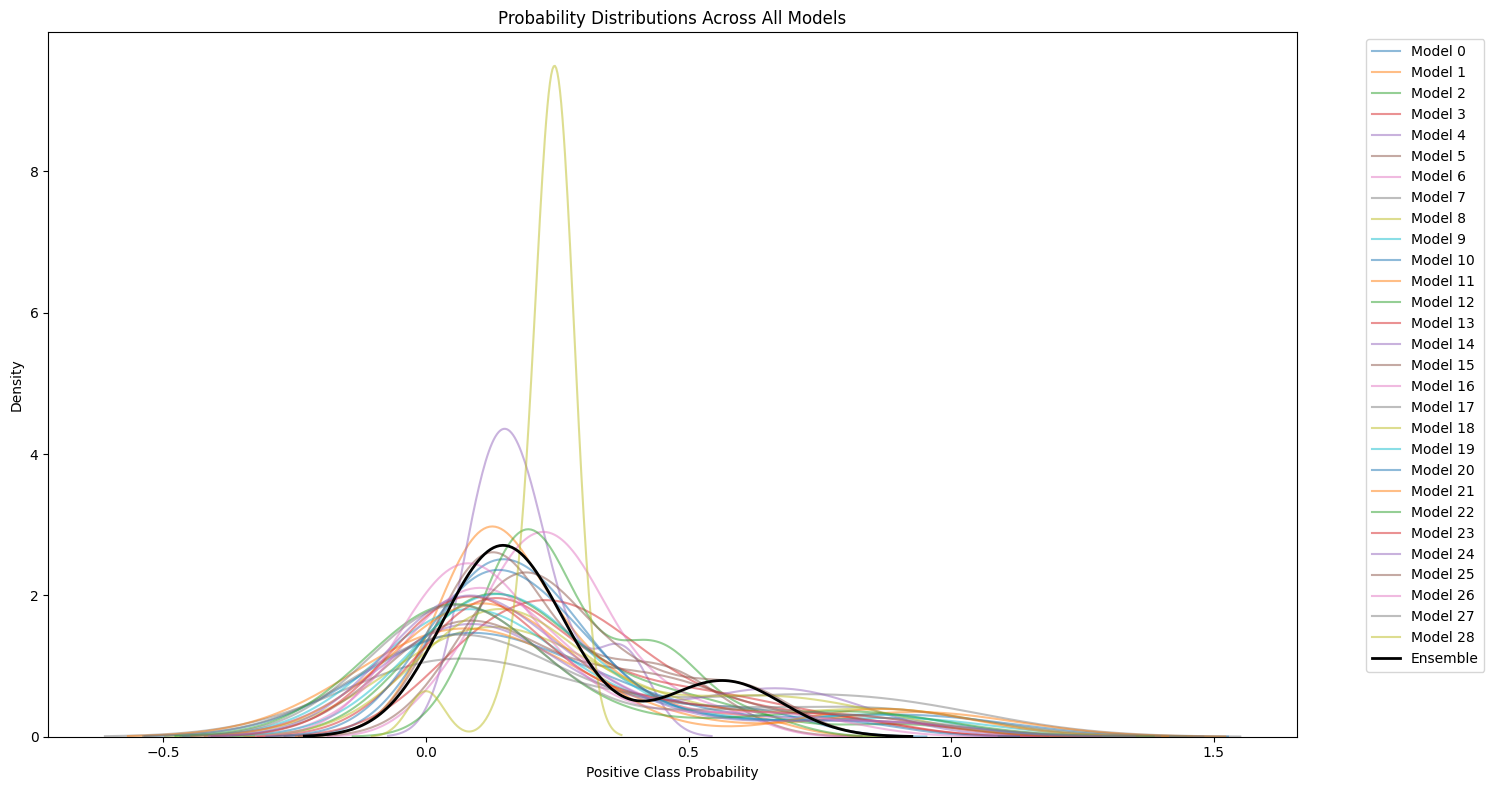

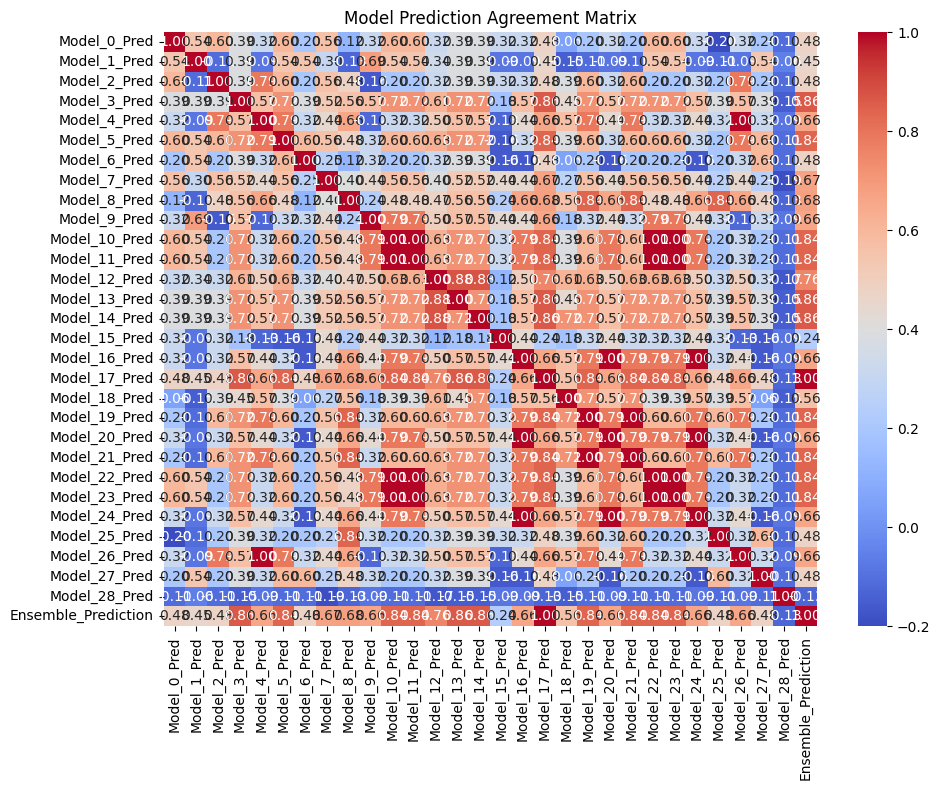

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
from tqdm import tqdm

# Configuration
test_dir = "/content/drive/MyDrive/SIFT_Descriptors_test_df/"  # Directory with test CSVs
model_dir = "/content/drive/MyDrive/SVM_Models/"
output_dir = "/content/drive/MyDrive/Results/"
os.makedirs(output_dir, exist_ok=True)

# Initialize storage for results
metrics = []
all_predictions = []
all_probabilities = []
test_dfs = []

# First pass: Load all test data
print("Loading test data...")
for landmark_num in tqdm(range(29)):
    test_file = os.path.join(test_dir, f"Landmark_{landmark_num}_SIFT_Descriptors.csv")
    df = pd.read_csv(test_file)

    # Get SIFT columns for this landmark
    sift_columns = [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

    # Fill NA and normalize (same as training)
    df[sift_columns] = df[sift_columns].fillna(0)
    row_sums = df[sift_columns].sum(axis=1)
    df[sift_columns] = df[sift_columns].div(row_sums.replace(0, 1), axis=0)  # Handle zero sums

    # Add label column - same logic as training
    df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)

    # Store the processed dataframe
    test_dfs.append(df)

# Second pass: Process each model
print("\nEvaluating models...")
for landmark_num in tqdm(range(29)):
    # Get the pre-processed test data for this landmark
    test_df = test_dfs[landmark_num]
    sift_columns = [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

    X_test = test_df[sift_columns]
    y_test = test_df['Label']

    # Load model
    model_path = os.path.join(model_dir, f"svm_landmark_{landmark_num}.joblib")
    model = joblib.load(model_path)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Store predictions and probabilities
    all_predictions.append(y_pred)
    all_probabilities.append(y_proba)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Store metrics
    metrics.append({
        'Landmark': landmark_num,
        'Accuracy': accuracy,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'TP': cm[1, 1],
        'FP': cm[0, 1],
        'FN': cm[1, 0],
        'TN': cm[0, 0]
    })

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(os.path.join(output_dir, 'individual_metrics.csv'), index=False)

# Create a comprehensive results DataFrame with all probabilities
results_df = test_dfs[0][['Image_Name', 'Name', 'Label']].copy()

# Add predictions and probabilities from each model
for landmark_num in range(29):
    results_df[f'Model_{landmark_num}_Pred'] = all_predictions[landmark_num]
    results_df[f'Model_{landmark_num}_Proba'] = all_probabilities[landmark_num]

# Ensemble predictions (maximum voting)
all_predictions = np.array(all_predictions)
ensemble_pred = np.round(np.mean(all_predictions, axis=0))  # Majority vote

# Ensemble probabilities (average)
all_probabilities = np.array(all_probabilities)
avg_probabilities = np.mean(all_probabilities, axis=0)

# Add ensemble results
results_df['Ensemble_Prediction'] = ensemble_pred
results_df['Average_Probability'] = avg_probabilities
results_df['Correct'] = results_df['Label'] == results_df['Ensemble_Prediction']

# Evaluate ensemble
y_test = test_dfs[0]['Label']
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_report = classification_report(y_test, ensemble_pred, output_dict=True)
ensemble_cm = confusion_matrix(y_test, ensemble_pred)

# Save all results
results_df.to_csv(os.path.join(output_dir, 'final_results_with_all_probabilities.csv'), index=False)

# Create a summary of probabilities
prob_summary = results_df[[col for col in results_df.columns if 'Proba' in col or col in ['Name', 'Label']]]
prob_summary['Ensemble_Proba'] = avg_probabilities

# Save probability summary
prob_summary.to_csv(os.path.join(output_dir, 'probability_summary.csv'), index=False)

# Visualize probability distributions
plt.figure(figsize=(15, 8))
for i in range(29):
    sns.kdeplot(results_df[f'Model_{i}_Proba'], label=f'Model {i}', alpha=0.5)
sns.kdeplot(avg_probabilities, label='Ensemble', color='black', linewidth=2)
plt.title('Probability Distributions Across All Models')
plt.xlabel('Positive Class Probability')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'probability_distributions.png'))

# Visualize model agreement
plt.figure(figsize=(10, 8))
model_agreement = results_df[[col for col in results_df.columns if 'Pred' in col]].corr()
sns.heatmap(model_agreement, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Model Prediction Agreement Matrix')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'model_agreement_matrix.png'))

In [ ]:
# Get all positive class probabilities and true labels
y_true = test_dfs[0]['Label'].values  # Assuming labels are consistent across models
y_proba_ensemble = avg_probabilities  # Ensemble probabilities

# Sort probabilities in descending order along with their true labels
sorted_indices = np.argsort(y_proba_ensemble)[::-1]
sorted_proba = y_proba_ensemble[sorted_indices]
sorted_true = y_true[sorted_indices]

# Calculate cumulative true positives
total_true_positives = np.sum(y_true == 1)
cumulative_true_positives = np.cumsum(sorted_true == 1)

# Find the smallest probability where >=80% of true positives are captured
target_recall = 0.80
required_true_positives = target_recall * total_true_positives
threshold_index = np.where(cumulative_true_positives >= required_true_positives)[0][0]
ptop_80_threshold = sorted_proba[threshold_index]

print(f"P top 80% threshold: {ptop_80_threshold:.4f}")
print(f"True Positives Captured: {cumulative_true_positives[threshold_index]}/{total_true_positives}")

P top 80% threshold: 0.5237
True Positives Captured: 4/4



Calculating trimmed average probabilities...
Saved trimmed probabilities to final_results_with_trimmed_probabilities.csv


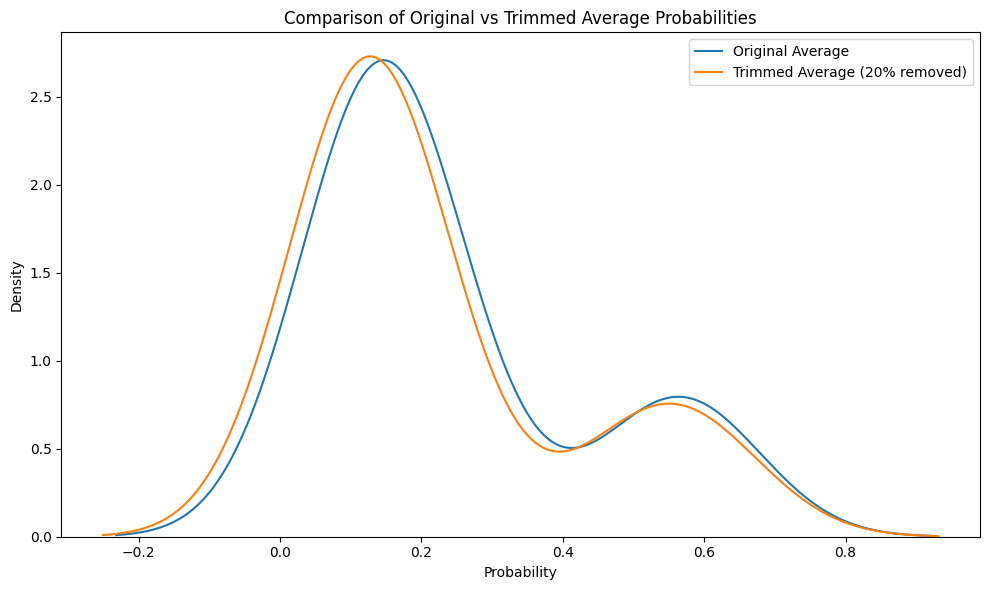

In [ ]:
# Calculate trimmed average probabilities (removing top 10% and bottom 10% per image)
print("\nCalculating trimmed average probabilities...")

def calculate_trimmed_average(row):
    # Get all probability columns for this row (image)
    proba_columns = [col for col in row.index if 'Model_' in col and 'Proba' in col]
    probas = row[proba_columns].values

    # Sort and trim
    sorted_probas = np.sort(probas)
    n = len(sorted_probas)
    trim_lower = int(0.10 * n)  # Bottom 10% cutoff
    trim_upper = int(0.90 * n)  # Top 10% cutoff

    # Keep middle 80%
    trimmed_probas = sorted_probas[trim_lower:trim_upper]

    return np.mean(trimmed_probas)

# Apply to each row
results_df['Trimmed_Average_Probability'] = results_df.apply(calculate_trimmed_average, axis=1)

# Save new CSV with trimmed probabilities
trimmed_filename = 'final_results_with_trimmed_probabilities.csv'
results_df.to_csv(os.path.join(output_dir, trimmed_filename), index=False)
print(f"Saved trimmed probabilities to {trimmed_filename}")

# Compare original vs trimmed averages
plt.figure(figsize=(10, 6))
sns.kdeplot(results_df['Average_Probability'], label='Original Average')
sns.kdeplot(results_df['Trimmed_Average_Probability'], label='Trimmed Average (20% removed)')
plt.title('Comparison of Original vs Trimmed Average Probabilities')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'trimmed_vs_original_probabilities.png'))

In [ ]:
from sklearn.metrics import roc_curve

# Get all positive and negative sample probabilities
y_true = results_df['Label'].values
y_scores = results_df['Average_Probability'].values  # Using ensemble probabilities

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Function to find TAR at specific FAR
def get_tar_at_far(far_target):
    # Find the threshold where FPR <= far_target
    idx = np.where(fpr <= far_target)[0][-1]  # Last threshold meeting the condition
    return tpr[idx], thresholds[idx]

# Calculate TAR@FAR=0.01 and 0.1
tar_001, threshold_001 = get_tar_at_far(0.01)
tar_01, threshold_01 = get_tar_at_far(0.1)

print(f"TAR@FAR=0.01: {tar_001:.4f} (Threshold: {threshold_001:.4f})")
print(f"TAR@FAR=0.1: {tar_01:.4f} (Threshold: {threshold_01:.4f})")

# Plot FAR vs TAR curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0.01, 0.01], [0, tar_001], 'r--')
plt.plot([0, 0.01], [tar_001, tar_001], 'r--', label=f'TAR@FAR=0.01: {tar_001:.2f}')
plt.plot([0.1, 0.1], [0, tar_01], 'g--')
plt.plot([0, 0.1], [tar_01, tar_01], 'g--', label=f'TAR@FAR=0.1: {tar_01:.2f}')
plt.xlim([0, 0.5])
plt.ylim([0, 1])
plt.xlabel('False Accept Rate (FAR)')
plt.ylabel('True Accept Rate (TAR)')
plt.title('TAR vs FAR Curve')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'tar_far_curve.png'))
plt.close()

# Save the results to a dataframe
tar_results = pd.DataFrame({
    'FAR': [0.01, 0.1],
    'TAR': [tar_001, tar_01],
    'Threshold': [threshold_001, threshold_01]
})
tar_results.to_csv(os.path.join(output_dir, 'tar_far_results.csv'), index=False)

TAR@FAR=0.01: 1.0000 (Threshold: 0.5237)
TAR@FAR=0.1: 1.0000 (Threshold: 0.5237)


**Naive Bayes  and GMM **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Define base paths
input_dir = "/content/drive/MyDrive/SIFT_Descriptors_train_df/"
output_base_dir = "/content/drive/MyDrive/Classification_Models/"

# Create separate directories for each model type
model_dirs = {
    'gnb': os.path.join(output_base_dir, "GaussianNB_Models"),
    'mnb': os.path.join(output_base_dir, "MultinomialNB_Models"),
    'gmm': os.path.join(output_base_dir, "GMM_Models")
}

# Create directories if they don't exist
for dir_path in model_dirs.values():
    os.makedirs(dir_path, exist_ok=True)

# Function to get SIFT columns
def get_sift_columns(landmark_num):
    return [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

# Define pipelines
def create_gnb_pipeline():
    return Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler()),
        ('gnb', GaussianNB())
    ])

def create_mnb_pipeline():
    return Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('mnb', MultinomialNB())
    ])

def create_gmm_pipeline():
    return Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler()),
        ('gmm', GaussianMixture(random_state=42))
    ])

# Parameter grids
gnb_params = {'gnb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
mnb_params = {
    'mnb__alpha': [0.1, 0.5, 1.0, 2.0],
    'mnb__fit_prior': [True, False]
}
gmm_params = {
    'gmm__n_components': [1, 2, 3, 4],
    'gmm__covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Process each landmark
for landmark_num in range(29):  # Landmark_0 to Landmark_28
    # Load and prepare data
    df = pd.read_csv(os.path.join(input_dir, f"Landmark_{landmark_num}_SIFT_Descriptors.csv"))
    sift_cols = get_sift_columns(landmark_num)

    # Create labels (modify as needed)
    df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)

    # Preprocess
    df[sift_cols] = df[sift_cols].fillna(0)
    row_sums = df[sift_cols].sum(axis=1)
    df[sift_cols] = df[sift_cols].div(row_sums, axis=0)

    X_train = df[sift_cols]
    y_train = df['Label']

    # Define models
    models = [
        ('gnb', create_gnb_pipeline(), gnb_params),
        ('mnb', create_mnb_pipeline(), mnb_params),
        ('gmm', create_gmm_pipeline(), gmm_params)
    ]

    # Train and save each model
    for model_name, pipeline, params in models:
        print(f"\nTraining {model_name} for Landmark {landmark_num}")

        grid = GridSearchCV(
            pipeline,
            param_grid=params,
            scoring='accuracy',
            cv=5,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train, y_train)

        # Save to model-specific directory
        output_path = os.path.join(model_dirs[model_name], f"landmark_{landmark_num}.joblib")
        joblib.dump(grid.best_estimator_, output_path)

        print(f"Saved to {output_path}")
        print(f"Best params: {grid.best_params_}")
        print(f"Best accuracy: {grid.best_score_:.4f}")

print("\nAll models trained and saved in separate directories!")


Training gnb for Landmark 0
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Saved to /content/drive/MyDrive/Classification_Models/GaussianNB_Models/landmark_0.joblib
Best params: {'gnb__var_smoothing': 1e-09}
Best accuracy: 0.6769

Training mnb for Landmark 0
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Saved to /content/drive/MyDrive/Classification_Models/MultinomialNB_Models/landmark_0.joblib
Best params: {'mnb__alpha': 0.1, 'mnb__fit_prior': True}
Best accuracy: 0.7648

Training gmm for Landmark 0
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Saved to /content/drive/MyDrive/Classification_Models/GMM_Models/landmark_0.joblib
Best params: {'gmm__covariance_type': 'full', 'gmm__n_components': 1}
Best accuracy: 0.7659

Training gnb for Landmark 1
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Saved to /content/drive/MyDrive/Classification_Models/GaussianNB_Models/landmark_1.joblib
Best params: {'gnb__var_smoothing': 1e-09}
Best acc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
from tqdm import tqdm

# Configuration
test_dir = "/content/drive/MyDrive/SIFT_Descriptors_test_df/"  # Directory with test CSVs
output_base_dir = "/content/drive/MyDrive/Classification_Results/"

# Model types to evaluate
model_types = {
    'gnb': "GaussianNB_Models",
    'mnb': "MultinomialNB_Models",
    'gmm': "GMM_Models"
}

# Create directories if they don't exist
for model_type, model_dir in model_types.items():
    os.makedirs(os.path.join(output_base_dir, model_dir), exist_ok=True)

# Initialize storage for all model results
all_metrics = {}
all_predictions = {}
all_probabilities = {}
all_results = {}

# First pass: Load all test data (same as before)
print("Loading test data...")
test_dfs = []
for landmark_num in tqdm(range(29)):
    test_file = os.path.join(test_dir, f"Landmark_{landmark_num}_SIFT_Descriptors.csv")
    df = pd.read_csv(test_file)

    sift_columns = [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

    df[sift_columns] = df[sift_columns].fillna(0)
    row_sums = df[sift_columns].sum(axis=1)
    df[sift_columns] = df[sift_columns].div(row_sums.replace(0, 1), axis=0)

    df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)

    test_dfs.append(df)

# Process each model type separately
for model_type, model_dir in model_types.items():
    print(f"\nEvaluating {model_type} models...")

    model_dir_path = os.path.join("/content/drive/MyDrive/Classification_Models/", model_dir)
    output_dir = os.path.join(output_base_dir, model_dir)
    os.makedirs(output_dir, exist_ok=True)

    # Initialize storage for this model type
    metrics = []
    predictions = []
    probabilities = []

    # Process each landmark
    for landmark_num in tqdm(range(29)):
        # Get pre-processed test data
        test_df = test_dfs[landmark_num]
        sift_columns = [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

        X_test = test_df[sift_columns]
        y_test = test_df['Label']

        # Load model
        model_path = os.path.join(model_dir_path, f"landmark_{landmark_num}.joblib")
        model = joblib.load(model_path)

        # Make predictions (handle GMM differently)
        if model_type == 'gmm':
            # GMM returns log probabilities - convert to probabilities
            log_probs = model.score_samples(X_test)
            y_proba = np.exp(log_probs)[:, 1]  # Assuming 2 components, second is positive class
            y_pred = (y_proba > 0.5).astype(int)
        else:
            # Naive Bayes models
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

        # Store predictions and probabilities
        predictions.append(y_pred)
        probabilities.append(y_proba)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        # Store metrics
        metrics.append({
            'Landmark': landmark_num,
            'Accuracy': accuracy,
            'Precision': report['1']['precision'],
            'Recall': report['1']['recall'],
            'F1-Score': report['1']['f1-score'],
            'TP': cm[1, 1],
            'FP': cm[0, 1],
            'FN': cm[1, 0],
            'TN': cm[0, 0]
        })

    # Save metrics for this model type
    metrics_df = pd.DataFrame(metrics)
    metrics_df.to_csv(os.path.join(output_dir, 'individual_metrics.csv'), index=False)
    all_metrics[model_type] = metrics_df

    # Create comprehensive results DataFrame
    results_df = test_dfs[0][['Image_Name', 'Name', 'Label']].copy()

    # Add predictions and probabilities from each model
    for landmark_num in range(29):
        results_df[f'Model_{landmark_num}_Pred'] = predictions[landmark_num]
        results_df[f'Model_{landmark_num}_Proba'] = probabilities[landmark_num]

    # Ensemble predictions (majority voting)
    predictions_array = np.array(predictions)
    ensemble_pred = np.round(np.mean(predictions_array, axis=0))

    # Ensemble probabilities (average)
    probabilities_array = np.array(probabilities)
    avg_probabilities = np.mean(probabilities_array, axis=0)

    # Add ensemble results
    results_df['Ensemble_Prediction'] = ensemble_pred
    results_df['Average_Probability'] = avg_probabilities
    results_df['Correct'] = results_df['Label'] == results_df['Ensemble_Prediction']

    # Evaluate ensemble
    y_test = test_dfs[0]['Label']
    ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
    ensemble_report = classification_report(y_test, ensemble_pred, output_dict=True)
    ensemble_cm = confusion_matrix(y_test, ensemble_pred)

    # Save ensemble metrics
    ensemble_metrics = {
        'Accuracy': ensemble_accuracy,
        'Precision': ensemble_report['1']['precision'],
        'Recall': ensemble_report['1']['recall'],
        'F1-Score': ensemble_report['1']['f1-score'],
        'TP': ensemble_cm[1, 1],
        'FP': ensemble_cm[0, 1],
        'FN': ensemble_cm[1, 0],
        'TN': ensemble_cm[0, 0]
    }
    pd.DataFrame([ensemble_metrics]).to_csv(os.path.join(output_dir, 'ensemble_metrics.csv'), index=False)

    # Save all results
    results_df.to_csv(os.path.join(output_dir, 'final_results_with_all_probabilities.csv'), index=False)
    all_results[model_type] = results_df

    # Create and save probability summary
    prob_summary = results_df[[col for col in results_df.columns if 'Proba' in col or col in ['Name', 'Label']]]
    prob_summary['Ensemble_Proba'] = avg_probabilities
    prob_summary.to_csv(os.path.join(output_dir, 'probability_summary.csv'), index=False)

    # Visualize probability distributions
    plt.figure(figsize=(15, 8))
    for i in range(29):
        sns.kdeplot(results_df[f'Model_{i}_Proba'], label=f'Model {i}', alpha=0.5)
    sns.kdeplot(avg_probabilities, label='Ensemble', color='black', linewidth=2)
    plt.title(f'Probability Distributions - {model_type}')
    plt.xlabel('Positive Class Probability')
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'probability_distributions.png'))
    plt.close()

    # Visualize model agreement
    plt.figure(figsize=(10, 8))
    model_agreement = results_df[[col for col in results_df.columns if 'Pred' in col]].corr()
    sns.heatmap(model_agreement, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f'Model Prediction Agreement - {model_type}')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'model_agreement_matrix.png'))
    plt.close()

print("\nAll models evaluated and results saved in separate directories!")

Loading test data...


  0%|          | 0/29 [00:00<?, ?it/s]<ipython-input-2-3bb19b7f70e3>:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)
  3%|▎         | 1/29 [00:00<00:17,  1.57it/s]<ipython-input-2-3bb19b7f70e3>:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Angelina_Jolie' else 0)
  7%|▋         | 2/29 [00:00<00:12,  2.22it/s]<ipython-input-2-3bb19b7f70e3>:44: PerformanceWarning: DataFrame is highly fragmented.  Th


Evaluating gnb models...


100%|██████████| 29/29 [00:07<00:00,  3.66it/s]
<ipython-input-2-3bb19b7f70e3>:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_summary['Ensemble_Proba'] = avg_probabilities



Evaluating mnb models...


  0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
  3%|▎     


Evaluating gmm models...


  0%|          | 0/29 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Results/final_results_with_all_probabilities.csv')
# Get all model prediction columns (columns starting with 'Model_' and ending with '_Pred')
model_pred_cols = [col for col in df.columns if col.startswith('Model_') and col.endswith('_Pred')]

# Create a new column counting the number of 1 predictions
df['Count_1'] = df[model_pred_cols].sum(axis=1)

# Create a new column counting the number of 0 predictions
df['Count_0'] = len(model_pred_cols) - df['Count_1']

# Create a new column with the majority vote prediction
df['Majority_Vote'] = (df['Count_1'] > df['Count_0']).astype(int)
df

,Image_Name,Name,Label,Model_0_Pred,Model_0_Proba,Model_1_Pred,Model_1_Proba,Model_2_Pred,Model_2_Proba,Model_3_Pred,...,Model_27_Pred,Model_27_Proba,Model_28_Pred,Model_28_Proba,Ensemble_Prediction,Average_Probability,Correct,Count_1,Count_0,Majority_Vote
0,Angelina_Jolie_0009.jpg,Angelina_Jolie,1,1,0.546256,0,0.253258,1,0.531250,1,...,0,0.533549,0,2.362893e-01,1.0,0.597769,True,22,7,1
1,Angelina_Jolie_0019.jpg,Angelina_Jolie,1,0,0.280228,0,0.441884,1,0.901890,1,...,1,0.741303,0,2.386138e-01,1.0,0.526862,True,17,12,1
2,Andre_Agassi_0001.jpg,Andre_Agassi,0,0,0.208150,0,0.346278,0,0.384584,0,...,0,0.027604,0,2.367383e-01,0.0,0.128827,True,0,29,0
3,Angelina_Jolie_0003.jpg,Angelina_Jolie,1,1,0.662784,1,0.609616,0,0.368407,1,...,1,0.562982,0,2.379516e-01,1.0,0.523740,True,16,13,1
4,Andy_Roddick_0003.jpg,Andy_Roddick,0,0,0.151582,0,0.080923,0,0.069417,0,...,0,0.079505,0,2.546115e-01,0.0,0.178677,True,1,28,0
5,Ann_Veneman_0001.jpg,Ann_Veneman,0,0,0.183125,0,0.146844,0,0.120308,0,...,0,0.032714,0,2.430555e-01,0.0,0.173938,True,2,27,0
6,Andre_Agassi_0005.jpg,Andre_Agassi,0,0,0.070061,0,0.101481,0,0.141521,1,...,0,0.065898,0,2.585000e-01,0.0,0.146599,True,1,28,0
7,Anna_Kournikova_0006.jpg,Anna_Kournikova,0,1,0.407565,0,0.314250,1,0.548895,0,...,0,0.014531,0,1.652145e-01,0.0,0.227535,True,4,25,0
8,Andy_Roddick_0007.jpg,Andy_Roddick,0,0,0.115335,0,0.096219,0,0.018417,0,...,0,0.014193,0,2.387975e-01,0.0,0.141693,True,1,28,0
9,Andre_Agassi_0015.jpg,Andre_Agassi,0,0,0.158667,0,0.174792,0,0.217357,0,...,1,0.922016,0,2.284492e-01,0.0,0.239591,True,3,26,0


In [ ]:
import numpy as np
# Extract probabilities
probs = df['Average_Probability'].values
# Method 1: Using numpy's percentile
ptop_80_threshold = np.percentile(probs, 80)  # 80th percentile

# Method 2: Manual calculation (equivalent)
sorted_probs = np.sort(probs)
idx = int(len(sorted_probs) * 0.8)  # 80% cutoff index
ptop_80_threshold = sorted_probs[idx]

print(f"Ptop 80% threshold: {ptop_80_threshold:.4f}")

Ptop 80% threshold: 0.5237


In [ ]:
import numpy as np

# Extract all probability columns (Model_0_Proba to Model_28_Proba)
proba_cols = [f"Model_{i}_Proba" for i in range(29)]  # Adjust if needed
all_probas = df[proba_cols].values  # Shape: (n_samples, 29)

# Compute 10% trimmed mean (adjust 'trim_percent' as needed)
trim_percent = 0.10
trimmed_means = np.array([
    np.mean(np.sort(row)[int(trim_percent * len(row)) : -int(trim_percent * len(row))])
    for row in all_probas
])

# Add to DataFrame
df["Trimmed_Mean_Probability"] = trimmed_means

In [ ]:
df

,Image_Name,Name,Label,Model_0_Pred,Model_0_Proba,Model_1_Pred,Model_1_Proba,Model_2_Pred,Model_2_Proba,Model_3_Pred,...,Model_27_Proba,Model_28_Pred,Model_28_Proba,Ensemble_Prediction,Average_Probability,Correct,Count_1,Count_0,Majority_Vote,Trimmed_Mean_Probability
0,Angelina_Jolie_0009.jpg,Angelina_Jolie,1,1,0.546256,0,0.253258,1,0.531250,1,...,0.533549,0,2.362893e-01,1.0,0.597769,True,22,7,1,0.599462
1,Angelina_Jolie_0019.jpg,Angelina_Jolie,1,0,0.280228,0,0.441884,1,0.901890,1,...,0.741303,0,2.386138e-01,1.0,0.526862,True,17,12,1,0.528391
2,Andre_Agassi_0001.jpg,Andre_Agassi,0,0,0.208150,0,0.346278,0,0.384584,0,...,0.027604,0,2.367383e-01,0.0,0.128827,True,0,29,0,0.119161
3,Angelina_Jolie_0003.jpg,Angelina_Jolie,1,1,0.662784,1,0.609616,0,0.368407,1,...,0.562982,0,2.379516e-01,1.0,0.523740,True,16,13,1,0.512846
4,Andy_Roddick_0003.jpg,Andy_Roddick,0,0,0.151582,0,0.080923,0,0.069417,0,...,0.079505,0,2.546115e-01,0.0,0.178677,True,1,28,0,0.166048
5,Ann_Veneman_0001.jpg,Ann_Veneman,0,0,0.183125,0,0.146844,0,0.120308,0,...,0.032714,0,2.430555e-01,0.0,0.173938,True,2,27,0,0.166359
6,Andre_Agassi_0005.jpg,Andre_Agassi,0,0,0.070061,0,0.101481,0,0.141521,1,...,0.065898,0,2.585000e-01,0.0,0.146599,True,1,28,0,0.137454
7,Anna_Kournikova_0006.jpg,Anna_Kournikova,0,1,0.407565,0,0.314250,1,0.548895,0,...,0.014531,0,1.652145e-01,0.0,0.227535,True,4,25,0,0.212188
8,Andy_Roddick_0007.jpg,Andy_Roddick,0,0,0.115335,0,0.096219,0,0.018417,0,...,0.014193,0,2.387975e-01,0.0,0.141693,True,1,28,0,0.125016
9,Andre_Agassi_0015.jpg,Andre_Agassi,0,0,0.158667,0,0.174792,0,0.217357,0,...,0.922016,0,2.284492e-01,0.0,0.239591,True,3,26,0,0.215172


for another person

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import joblib
import os

# Define paths and parameters
input_dir = "/content/drive/MyDrive/SIFT_Descriptors_train_df/"
output_dir = "/content/drive/MyDrive/SVM_Models_Andre_Agassi/"  # Create this directory first

# Function to get SIFT columns for a specific landmark
def get_sift_columns(landmark_num):
    return [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

# Define your pipeline and parameter grid
def create_svm_pipeline():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Fill NA with 0
        ('scaler', StandardScaler()),  # Standardize features
        ('svm', SVC(probability=True, random_state=42))  # SVM model
    ])
    return pipeline

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'svm__degree': [2, 3, 4]  # Degree for poly kernel
}

# Process each landmark file
for landmark_num in range(29):  # Assuming files are named Landmark_0 to Landmark_28
    file_path = os.path.join(input_dir, f"Landmark_{landmark_num}_SIFT_Descriptors.csv")

    # Load data
    df = pd.read_csv(file_path)

    # Get SIFT columns for this landmark
    sift_columns = get_sift_columns(landmark_num)

    # Create labels - modify this according to your actual labeling needs
    df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Andre_Agassi' else 0)

    # Fill NA and normalize
    df[sift_columns] = df[sift_columns].fillna(0)
    # Normalize each row (L1 normalization)
    row_sums = df[sift_columns].sum(axis=1)
    df[sift_columns] = df[sift_columns].div(row_sums, axis=0)

    # Prepare training data
    X_train = df[sift_columns]
    y_train = df['Label']

    # Create and train SVM model with grid search
    pipeline = create_svm_pipeline()
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    print(f"Training model for Landmark {landmark_num}...")
    grid_search.fit(X_train, y_train)

    # Save the best model
    best_model = grid_search.best_estimator_
    model_path = os.path.join(output_dir, f"svm_landmark_{landmark_num}.joblib")
    joblib.dump(best_model, model_path)

    # Print results
    print(f"Landmark {landmark_num} - Best parameters: {grid_search.best_params_}")
    print(f"Landmark {landmark_num} - Best CV accuracy: {grid_search.best_score_:.4f}")
    print("-" * 50)

print("All models trained and saved successfully!")

Training model for Landmark 0...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 0 - Best parameters: {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Landmark 0 - Best CV accuracy: 0.8527
--------------------------------------------------
Training model for Landmark 1...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 1 - Best parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Landmark 1 - Best CV accuracy: 0.8835
--------------------------------------------------
Training model for Landmark 2...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 2 - Best parameters: {'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Landmark 2 - Best CV accuracy: 0.8978
--------------------------------------------------
Training model for Landmark 3...
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Landmark 3 - Best parameter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
from tqdm import tqdm

# Configuration
test_dir = "/content/drive/MyDrive/SIFT_Descriptors_test_df/"  # Directory with test CSVs
model_dir = "/content/drive/MyDrive/SVM_Models_Andre_Agassi/"
output_dir = "/content/drive/MyDrive/Results_andre/"
os.makedirs(output_dir, exist_ok=True)

# Initialize storage for results
metrics = []
all_predictions = []
all_probabilities = []
test_dfs = []

# First pass: Load all test data
print("Loading test data...")
for landmark_num in tqdm(range(29)):
    test_file = os.path.join(test_dir, f"Landmark_{landmark_num}_SIFT_Descriptors.csv")
    df = pd.read_csv(test_file)

    # Get SIFT columns for this landmark
    sift_columns = [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

    # Fill NA and normalize (same as training)
    df[sift_columns] = df[sift_columns].fillna(0)
    row_sums = df[sift_columns].sum(axis=1)
    df[sift_columns] = df[sift_columns].div(row_sums.replace(0, 1), axis=0)  # Handle zero sums

    # Add label column - same logic as training
    df['Label'] = df['Name'].apply(lambda x: 1 if x == 'Andre_Agassi' else 0)

    # Store the processed dataframe
    test_dfs.append(df)

# Second pass: Process each model
print("\nEvaluating models...")
for landmark_num in tqdm(range(29)):
    # Get the pre-processed test data for this landmark
    test_df = test_dfs[landmark_num]
    sift_columns = [f'Landmark_{landmark_num}_SIFT_{i}' for i in range(128)]

    X_test = test_df[sift_columns]
    y_test = test_df['Label']

    # Load model
    model_path = os.path.join(model_dir, f"svm_landmark_{landmark_num}.joblib")
    model = joblib.load(model_path)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Store predictions and probabilities
    all_predictions.append(y_pred)
    all_probabilities.append(y_proba)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Store metrics
    metrics.append({
        'Landmark': landmark_num,
        'Accuracy': accuracy,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'TP': cm[1, 1],
        'FP': cm[0, 1],
        'FN': cm[1, 0],
        'TN': cm[0, 0]
    })

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(os.path.join(output_dir, 'individual_metrics.csv'), index=False)

# Create a comprehensive results DataFrame with all probabilities
results_df = test_dfs[0][['Image_Name', 'Name', 'Label']].copy()

# Add predictions and probabilities from each model
for landmark_num in range(29):
    results_df[f'Model_{landmark_num}_Pred'] = all_predictions[landmark_num]
    results_df[f'Model_{landmark_num}_Proba'] = all_probabilities[landmark_num]

# Calculate average probabilities
all_probabilities = np.array(all_probabilities)
avg_probabilities = np.mean(all_probabilities, axis=0)
results_df['Average_Probability'] = avg_probabilities

# Calculate Ptop80 threshold (80th percentile)
ptop_80_threshold = np.percentile(avg_probabilities, 80)
print(f"\nPtop 80% threshold: {ptop_80_threshold:.4f}")

# Create multiple ensemble predictions
results_df['Ensemble_Prediction_Majority'] = np.round(np.mean(all_predictions, axis=0))  # Original majority vote
results_df['Ensemble_Prediction_Ptop80'] = (avg_probabilities >= ptop_80_threshold).astype(int)  # New Ptop80 method
results_df['Ensemble_Prediction_Median'] = (avg_probabilities >= np.median(avg_probabilities)).astype(int)  # Median threshold

# Evaluate all ensemble methods
ensemble_metrics = []
methods = ['Majority', 'Ptop80', 'Median']

for method in methods:
    pred_col = f'Ensemble_Prediction_{method}'
    results_df[f'Correct_{method}'] = results_df['Label'] == results_df[pred_col]

    accuracy = accuracy_score(results_df['Label'], results_df[pred_col])
    report = classification_report(results_df['Label'], results_df[pred_col], output_dict=True)
    cm = confusion_matrix(results_df['Label'], results_df[pred_col])

    ensemble_metrics.append({
        'Method': method,
        'Threshold': 'Majority' if method == 'Majority' else f'{ptop_80_threshold:.4f}' if method == 'Ptop80' else f'{np.median(avg_probabilities):.4f}',
        'Accuracy': accuracy,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'TP': cm[1, 1],
        'FP': cm[0, 1],
        'FN': cm[1, 0],
        'TN': cm[0, 0],
        'Positive_Predictions': sum(results_df[pred_col])
    })

# Save ensemble comparison
ensemble_metrics_df = pd.DataFrame(ensemble_metrics)
ensemble_metrics_df.to_csv(os.path.join(output_dir, 'ensemble_comparison.csv'), index=False)

# Save all results
results_df.to_csv(os.path.join(output_dir, 'final_results_with_all_probabilities.csv'), index=False)

# Create a summary of probabilities
prob_summary = results_df[[col for col in results_df.columns if 'Proba' in col or col in ['Name', 'Label']]]
prob_summary.to_csv(os.path.join(output_dir, 'probability_summary.csv'), index=False)

# ====== VISUALIZATIONS ======

# 1. Probability Distributions
plt.figure(figsize=(15, 8))
for i in range(29):
    sns.kdeplot(results_df[f'Model_{i}_Proba'], alpha=0.3, linewidth=0.5)
sns.kdeplot(avg_probabilities, label='Average Probability', color='black', linewidth=2)
plt.axvline(ptop_80_threshold, color='red', linestyle='--', label=f'Ptop 80% Threshold ({ptop_80_threshold:.2f})')
plt.axvline(np.median(avg_probabilities), color='blue', linestyle=':', label=f'Median ({np.median(avg_probabilities):.2f})')
plt.title('Probability Distributions Across All Models')
plt.xlabel('Positive Class Probability')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'probability_distributions.png'))

# 2. Model Agreement Matrix
plt.figure(figsize=(12, 10))
model_agreement = results_df[[col for col in results_df.columns if 'Pred' in col]].corr()
sns.heatmap(model_agreement, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Model Prediction Agreement Matrix')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'model_agreement_matrix.png'))

# 3. Performance Comparison Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='F1-Score', data=ensemble_metrics_df, palette='viridis')
plt.title('Ensemble Method Comparison (F1-Score)')
plt.ylabel('F1-Score')
plt.xlabel('Ensemble Method')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'ensemble_method_comparison.png'))

print("\nProcessing complete! Results saved to:", output_dir)


Evaluating models...


100%|██████████| 29/29 [00:00<00:00, 95474.74it/s]


Evaluation complete! All results saved to: /content/drive/MyDrive/Results_LBP/


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Results_andre/final_results_with_all_probabilities.csv')
# Get all model prediction columns (columns starting with 'Model_' and ending with '_Pred')
model_pred_cols = [col for col in df.columns if col.startswith('Model_') and col.endswith('_Pred')]

# Create a new column counting the number of 1 predictions
df['Count_1'] = df[model_pred_cols].sum(axis=1)

# Create a new column counting the number of 0 predictions
df['Count_0'] = len(model_pred_cols) - df['Count_1']

# Create a new column with the majority vote prediction
df['Majority_Vote'] = (df['Count_1'] > df['Count_0']).astype(int)
df

,Image_Name,Name,Label,Model_0_Pred,Model_0_Proba,Model_1_Pred,Model_1_Proba,Model_2_Pred,Model_2_Proba,Model_3_Pred,...,Average_Probability,Ensemble_Prediction_Majority,Ensemble_Prediction_Ptop80,Ensemble_Prediction_Median,Correct_Majority,Correct_Ptop80,Correct_Median,Count_1,Count_0,Majority_Vote
0,Angelina_Jolie_0009.jpg,Angelina_Jolie,0,0,0.059248,0,0.146623,0,0.062797,0,...,0.068920,0.0,0,0,True,True,True,0,29,0
1,Angelina_Jolie_0019.jpg,Angelina_Jolie,0,0,0.166470,0,0.122622,0,0.035470,0,...,0.076590,0.0,0,0,True,True,True,1,28,0
2,Andre_Agassi_0001.jpg,Andre_Agassi,1,0,0.191696,0,0.168419,1,0.522128,0,...,0.490103,0.0,1,1,False,True,True,11,18,0
3,Angelina_Jolie_0003.jpg,Angelina_Jolie,0,0,0.113047,0,0.172569,0,0.097272,0,...,0.123026,0.0,0,0,True,True,True,1,28,0
4,Andy_Roddick_0003.jpg,Andy_Roddick,0,1,0.270522,0,0.247118,0,0.454001,1,...,0.217163,0.0,0,1,True,True,False,2,27,0
5,Ann_Veneman_0001.jpg,Ann_Veneman,0,0,0.180543,0,0.278449,1,0.563014,0,...,0.145114,0.0,0,0,True,True,True,2,27,0
6,Andre_Agassi_0005.jpg,Andre_Agassi,1,0,0.206337,0,0.171624,0,0.433237,1,...,0.477496,0.0,1,1,False,True,True,11,18,0
7,Anna_Kournikova_0006.jpg,Anna_Kournikova,0,0,0.168028,0,0.172856,0,0.099896,0,...,0.126271,0.0,0,0,True,True,True,1,28,0
8,Andy_Roddick_0007.jpg,Andy_Roddick,0,0,0.071630,0,0.144317,0,0.328087,1,...,0.300369,0.0,1,1,True,False,False,5,24,0
9,Andre_Agassi_0015.jpg,Andre_Agassi,1,0,0.135087,1,0.318908,0,0.220211,0,...,0.384791,0.0,1,1,False,True,True,9,20,0


In [ ]:
import numpy as np
# Extract probabilities
probs = df['Average_Probability'].values
# Method 1: Using numpy's percentile
ptop_80_threshold = np.percentile(probs, 80)  # 80th percentile

# Method 2: Manual calculation (equivalent)
sorted_probs = np.sort(probs)
idx = int(len(sorted_probs) * 0.8)  # 80% cutoff index
ptop_80_threshold = sorted_probs[idx]

print(f"Ptop 80% threshold: {ptop_80_threshold:.4f}")

Ptop 80% threshold: 0.3004


In [ ]:
import numpy as np

# Get probabilities for imposter cases (Label == 0)
imposter_probs = df[df['Label'] == 0]['Average_Probability'].sort_values().values

# Calculate the index for 99.99% FAR (0.01% false acceptances)
far_0_01_percentile = 99.99  # Since FAR = 0.01%
threshold_idx = int(len(imposter_probs) * (far_0_01_percentile / 100))

# Get the threshold value
threshold_far_0_01 = imposter_probs[threshold_idx]

print(f"Threshold at 0.01% FAR: {threshold_far_0_01:.6f}")

Threshold at 0.01% FAR: 0.300369


In [ ]:
# Calculate FAR
false_acceptances = df[(df['Label'] == 0) & (df['Average_Probability'] >= threshold_far_0_01)].shape[0]
total_imposter_attempts = df[df['Label'] == 0].shape[0]
FAR = (false_acceptances / total_imposter_attempts) * 100

# Calculate TAR (True Acceptance Rate = Recall)
true_acceptances = df[(df['Label'] == 1) & (df['Average_Probability'] >= threshold_far_0_01)].shape[0]
total_genuine_users = df[df['Label'] == 1].shape[0]
TAR = (true_acceptances / total_genuine_users) * 100

print(f"At threshold = {threshold_far_0_01:.6f}:")
print(f"- False Acceptance Rate (FAR) = {FAR:.4f}% (Expected ~0.01%)")
print(f"- True Acceptance Rate (TAR)  = {TAR:.2f}%")

At threshold = 0.300369:
- False Acceptance Rate (FAR) = 6.6667% (Expected ~0.01%)
- True Acceptance Rate (TAR)  = 100.00%


In [ ]:
import numpy as np

# Get probabilities for imposter cases (Label == 0)
imposter_probs = df[df['Label'] == 0]['Average_Probability'].sort_values().values

# Calculate the index for 99.99% FAR (0.01% false acceptances)
far_0_01_percentile = 99.9  # Since FAR = 0.01%
threshold_idx = int(len(imposter_probs) * (far_0_01_percentile / 100))

# Get the threshold value
threshold_far_0_01 = imposter_probs[threshold_idx]

print(f"Threshold at 0.01% FAR: {threshold_far_0_01:.6f}")

Threshold at 0.01% FAR: 0.300369


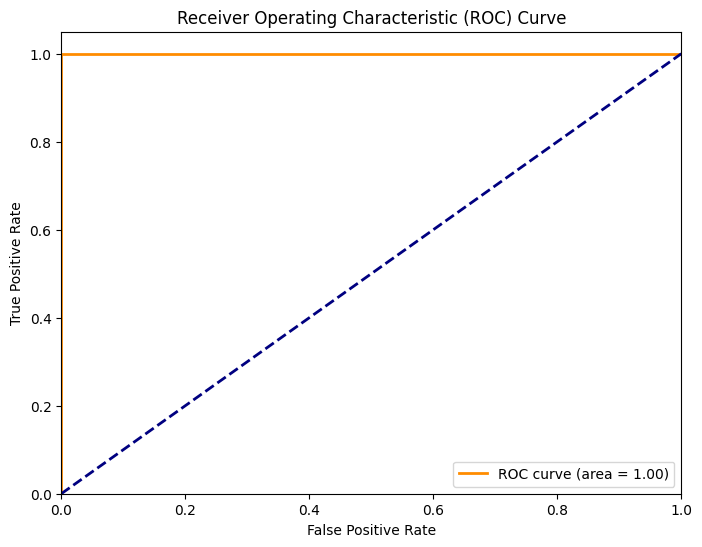

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
df=pd.read_csv('/content/drive/MyDrive/Results_andre/final_results_with_all_probabilities.csv')
y_true = df['Label']
y_score = df['Average_Probability']

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
threshold = 0.2604

# Calculate False Acceptance Rate (FAR)
false_acceptances = df[(df['Label'] == 0) & (df['Average_Probability'] >= threshold)].shape[0]
total_imposter_attempts = df[df['Label'] == 0].shape[0]
FAR = (false_acceptances / total_imposter_attempts) * 100

# Calculate True Acceptance Rate (TAR)
true_acceptances = df[(df['Label'] == 1) & (df['Average_Probability'] >= threshold)].shape[0]
total_genuine_users = df[df['Label'] == 1].shape[0]
TAR = (true_acceptances / total_genuine_users) * 100

print(f"At threshold = {threshold:.4f}:")
print(f"- False Acceptance Rate (FAR) = {FAR:.2f}%")
print(f"- True Acceptance Rate (TAR)  = {TAR:.2f}%")

At threshold = 0.2604:
- False Acceptance Rate (FAR) = 6.67%
- True Acceptance Rate (TAR)  = 100.00%


At threshold = 0.2604:
- False Acceptance Rate (FAR) = 6.67%
- True Acceptance Rate (TAR) = 100.00%
At threshold = 0.2604:
- False Acceptance Rate (FAR) = 6.67%
- True Acceptance Rate (TAR) = 100.00%


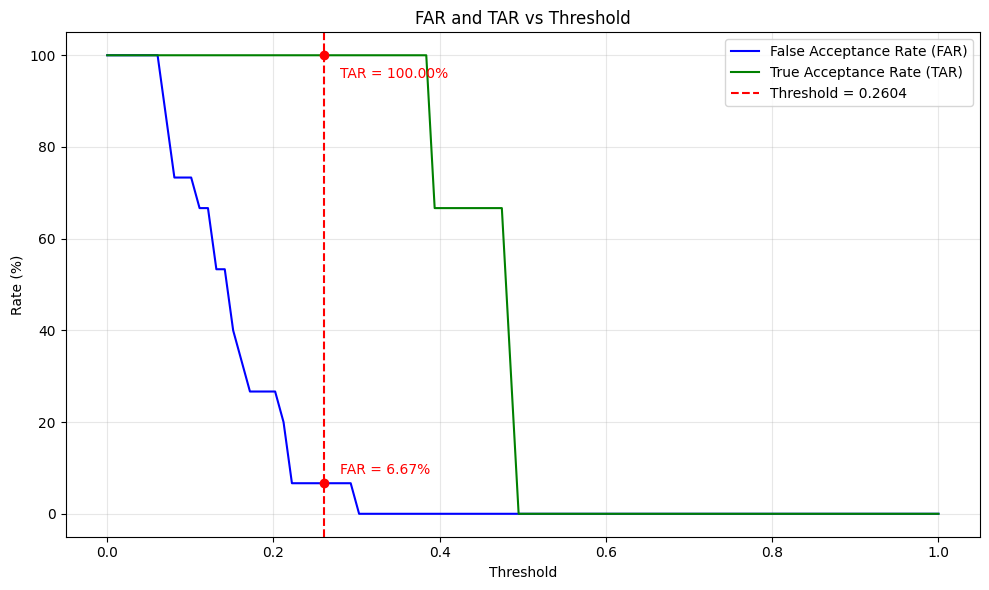

np.float64(1.0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming df is your dataframe with 'Label' and 'Average_Probability' columns
# If you don't have df loaded yet, uncomment and modify this to load your data:
# df = pd.read_csv('your_data.csv')

# Function to calculate FAR and TAR at a specific threshold
def calculate_metrics(df, threshold):
    # Calculate False Acceptance Rate (FAR)
    false_acceptances = df[(df['Label'] == 0) & (df['Average_Probability'] >= threshold)].shape[0]
    total_imposter_attempts = df[df['Label'] == 0].shape[0]
    FAR = (false_acceptances / total_imposter_attempts) * 100 if total_imposter_attempts > 0 else 0

    # Calculate True Acceptance Rate (TAR)
    true_acceptances = df[(df['Label'] == 1) & (df['Average_Probability'] >= threshold)].shape[0]
    total_genuine_users = df[df['Label'] == 1].shape[0]
    TAR = (true_acceptances / total_genuine_users) * 100 if total_genuine_users > 0 else 0

    return FAR, TAR

# Create FAR vs Threshold curve
def plot_far_vs_threshold(df, highlight_threshold=0.2604):
    # Generate a range of threshold values
    thresholds = np.linspace(0, 1, 100)

    # Calculate FAR and TAR for each threshold
    far_values = []
    tar_values = []

    for threshold in thresholds:
        far, tar = calculate_metrics(df, threshold)
        far_values.append(far)
        tar_values.append(tar)

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot FAR curve
    plt.plot(thresholds, far_values, 'b-', label='False Acceptance Rate (FAR)')

    # Plot TAR curve
    plt.plot(thresholds, tar_values, 'g-', label='True Acceptance Rate (TAR)')

    # Highlight the specific threshold
    specific_far, specific_tar = calculate_metrics(df, highlight_threshold)
    plt.axvline(x=highlight_threshold, color='r', linestyle='--', label=f'Threshold = {highlight_threshold:.4f}')
    plt.plot(highlight_threshold, specific_far, 'ro')
    plt.plot(highlight_threshold, specific_tar, 'ro')

    # Add text for the specific threshold values
    plt.text(highlight_threshold + 0.02, specific_far + 2, f'FAR = {specific_far:.2f}%', color='r')
    plt.text(highlight_threshold + 0.02, specific_tar - 5, f'TAR = {specific_tar:.2f}%', color='r')

    # ROC curve (optional - using scikit-learn)
    fpr, tpr, _ = roc_curve(df['Label'], df['Average_Probability'])
    roc_auc = auc(fpr, tpr)

    # Add labels and title
    plt.xlabel('Threshold')
    plt.ylabel('Rate (%)')
    plt.title('FAR and TAR vs Threshold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)

    # Display the specific threshold metrics
    print(f"At threshold = {highlight_threshold:.4f}:")
    print(f"- False Acceptance Rate (FAR) = {specific_far:.2f}%")
    print(f"- True Acceptance Rate (TAR) = {specific_tar:.2f}%")

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Return the ROC AUC score
    return roc_auc

# Example usage:
# roc_auc = plot_far_vs_threshold(df)
# print(f"ROC AUC: {roc_auc:.4f}")

# For your specific threshold calculation:
threshold = 0.2604
FAR, TAR = calculate_metrics(df, threshold)
print(f"At threshold = {threshold:.4f}:")
print(f"- False Acceptance Rate (FAR) = {FAR:.2f}%")
print(f"- True Acceptance Rate (TAR) = {TAR:.2f}%")
plot_far_vs_threshold(df,0.2604)